### Import Package

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk

from sklearn.cluster import KMeans

### Dataset yang digunakan

In [2]:
data = pd.read_csv("PrediksiHargaRumah.csv")
data.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,12500.0
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


### Mengubah nama atribut

In [3]:
data = data.rename(columns={'BHK':'Dapur, Kamar Tidur, Hall','Bathroom':'Kamar Mandi',
                            'Furnishing':'Perabotan','Locality':'Lokasi','Parking':'Parkir',
                            'Price':'Harga','Transaction':'Pembayaran','Type':'Tipe','Per_Sqft':'Luas Rumah'})

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Area                      1176 non-null   float64
 1   Dapur, Kamar Tidur, Hall  1176 non-null   int64  
 2   Kamar Mandi               1176 non-null   float64
 3   Perabotan                 1176 non-null   object 
 4   Lokasi                    1176 non-null   object 
 5   Parkir                    1176 non-null   float64
 6   Harga                     1176 non-null   int64  
 7   Status                    1176 non-null   object 
 8   Pembayaran                1176 non-null   object 
 9   Tipe                      1176 non-null   object 
 10  Luas Rumah                1176 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 101.2+ KB


### Dataset yang digunakan telah bersih (Tidak ada data null dan duplikat)

In [5]:
data.isna().sum()

Area                        0
Dapur, Kamar Tidur, Hall    0
Kamar Mandi                 0
Perabotan                   0
Lokasi                      0
Parkir                      0
Harga                       0
Status                      0
Pembayaran                  0
Tipe                        0
Luas Rumah                  0
dtype: int64

In [6]:
data.duplicated().sum()

0

### Algoritma K-Means Clustering

In [7]:
model = KMeans(n_clusters=2)

points = data[["Area", "Luas Rumah"]]

model.fit(points)

labels = model.labels_
print(labels)

[0 0 0 ... 0 0 0]


In [8]:
centroid = model.cluster_centers_

centroid_x = centroid[:,0]
centroid_y = centroid[:,1]

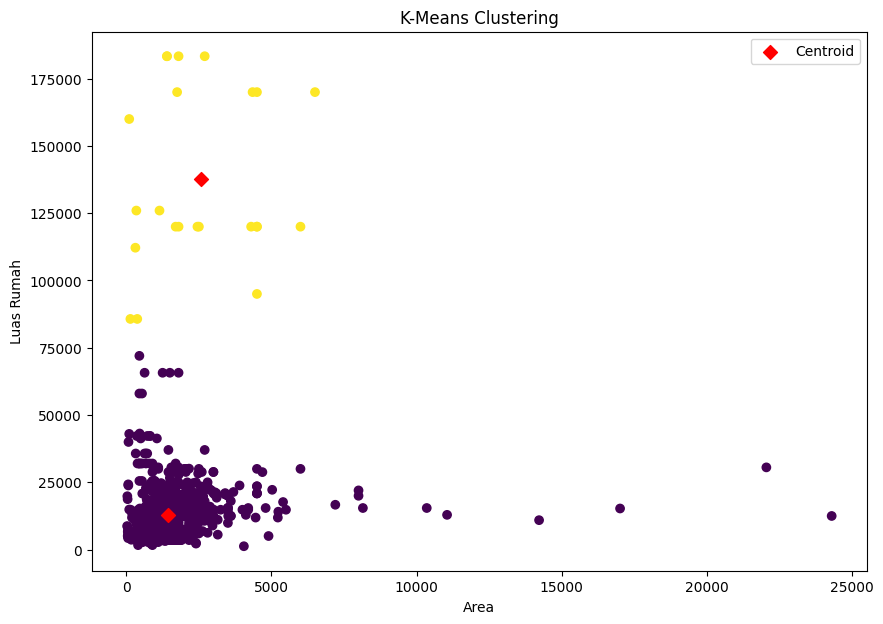

In [9]:
plt.figure(figsize=(10, 7))
plt.scatter(points["Area"], points["Luas Rumah"], alpha=1, c=labels)
plt.scatter(centroid_x, centroid_y, marker="D", s=50, label="Centroid", c='red')
plt.title("K-Means Clustering")
plt.xlabel("Area")
plt.ylabel("Luas Rumah")
plt.legend()
plt.show()

### Mencari nilai cluster paling baik

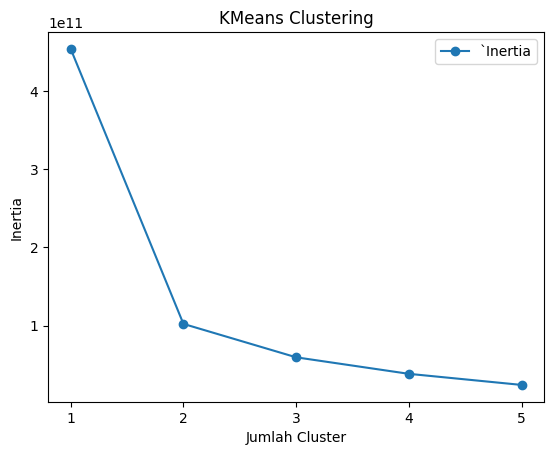

In [10]:
cluster_sum = range(1,6)
inertia = []

for cluster in cluster_sum:
    model = KMeans(n_clusters=cluster)
    model.fit(points)
    inertia.append(model.inertia_)
    
plt.plot(cluster_sum, inertia, '-o', label="`Inertia")
plt.xticks(cluster_sum)

plt.title("KMeans Clustering")
plt.xlabel("Jumlah Cluster")
plt.ylabel("Inertia")
plt.legend()

plt.show()